In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [60]:
def blending(path_img1, path_img2, height=6):
    img1 = cv2.imread(path_img1)
    img2 = cv2.imread(path_img2)

    #print(img1.shape, img2.shape)

    w, h, _ = img1.shape
    img2 = cv2.resize(img2, (h, w))

    print(img1.shape, img2.shape)

    # пирамида Гаусса для первого изображения
    gp1 = [img1]
    for i in range(height):
        img1 = cv2.pyrDown(img1)
        gp1.append(img1)

    # пирамида Гаусса для второго изображения
    gp2 = [img2]
    for i in range(height):
        img2 = cv2.pyrDown(img2)
        gp2.append(img2)

    # пирамида Лапласа для первого изображения
    lp1 = [gp1[height - 1]]
    for i in range(height - 1, 0, -1):
        GE = cv2.pyrUp(gp1[i])
        rows, cols, _ = gp1[i - 1].shape
        GE = GE[:rows, :cols]
        L = cv2.subtract(gp1[i - 1], GE)
        lp1.append(L)

    # пирамида Лапласа для второго изображения 
    lp2 = [gp2[height - 1]]
    for i in range(height - 1, 0, -1):
        GE = cv2.pyrUp(gp2[i])
        rows, cols, _ = gp2[i - 1].shape
        GE = GE[:rows, :cols]
        L = cv2.subtract(gp2[i - 1], GE)
        lp2.append(L)

    # соединяем левые и правые части на каждом уровне пирамид
    LS = []
    for l1, l2 in zip(lp1, lp2):
        _, cols, _ = l1.shape
        ls = np.hstack((l1[:, :int(cols / 2)], l2[:, int(cols / 2):]))
        LS.append(ls)

    res = LS[0]
    for i in range(1, height):
        res = cv2.pyrUp(res)
        rows, cols, _ = LS[i].shape
        res = res[:rows, :cols]
        res = cv2.add(res, LS[i])

    return res

(760, 760, 3) (760, 760, 3)
(760, 760, 3) (760, 760, 3)
(760, 760, 3) (760, 760, 3)


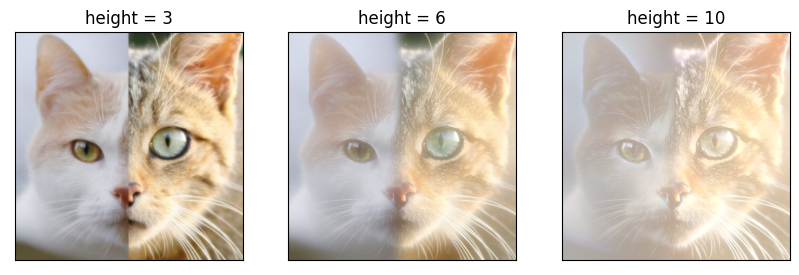

In [61]:

# выведем все результаты
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
list_h = [3, 6, 10]

for i, (ax, h) in enumerate(zip(axs.ravel(), list_h)):
    res = blending("cat2.jpg", "cat1.jpg", height=h)
    ax.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    ax.set_title('height = ' + str(h))
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)  